# Q 9 Plot all train routes on a map.

In [15]:
import src.data_processing.data as data
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point

In [42]:
provinces = data.provinces
stations = data.stations
sporen = data.sporen

<AxesSubplot: >

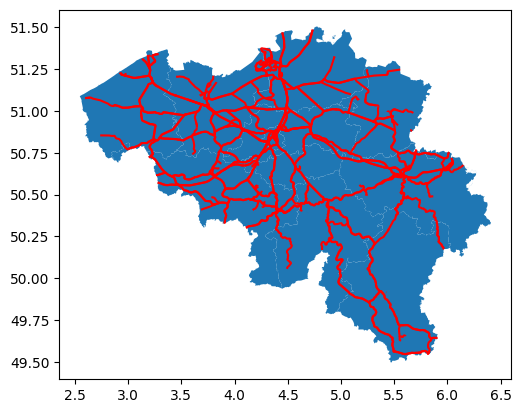

In [46]:
ax = sporen.plot(color ='red')
provinces.plot( linewidth=0.8, ax=ax)